<a href="https://colab.research.google.com/github/ajaythakur3369/AlmaBetter-Internship/blob/main/TED_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - TED Talk Views Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - AlmaBetter**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/AlmaBetter-Internship)**

# **Project Summary -**

#### TED is dedicated to spreading powerful ideas on virtually any topic. These datasets contain over 4,000 TED talks, including transcripts in multiple languages. Founded in 1984 by Richard Salman as a nonprofit organization aimed at bringing together experts from the fields of Technology, Entertainment, and Design, TED Conferences have evolved into the hub of ideas from various walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2,000 talks for free consumption by the masses, featuring renowned speakers such as Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

#### A TED talk is a presentation given at a TED (Technology, Entertainment, Design) conference or a TEDx event. These talks are typically delivered by experts in diverse fields such as science, technology, business, and the arts, with the aim of sharing ideas and inspiring the audience.

#### A project summary on a TED talk provides a concise overview of the main points and takeaways from the talk. It covers the speaker's primary argument or message, along with any significant insights or examples they shared. Additionally, it may include the speaker's background and credentials, as well as any pertinent research or data they referenced.

###**Dataset Information -**

* Number of instances is 4,005

* Number of attributes is 19

###**Features Information -**

* **talk_id**: Talk identification number provided by TED

* **title**: Title of the talk

* **speaker_1**: First speaker in TED's speaker list

* **all_speakers**: Speakers in the talk

* **occupations**: Occupations of the speakers

* **about_speakers**: Blurb about each speaker

* **recorded_date**: Date the talk was recorded

* **published_date**: Date the talk was published to TED.com

* **event**: Event or medium in which the talk was given

* **native_lang**: Language the talk was given in

* **available_lang**: All available languages (lang_code) for a talk

* **comments**: Count of comments

* **duration**: Duration in seconds

* **topics**: Related tags or topics for the talk

* **related_talks**: Related talks (key='talk_id',value='title')

* **url**: URL of the talk

* **description**: Description of the talk

* **transcript**: Full transcript of the talk

###**Target Variable -**

* **views**: Count of views



# **Problem Statement -**


**Write Problem Statement Here.**

* The main objective is to build a predictive model that can help predict the views of videos uploaded on the TEDx website.

# **General Guidelines** -  

1. Well-structured, formatted, and commented code is required.
2. Exception Handling, Production Grade Code, and Deployment Ready Code will be a plus. Students who implement these will be awarded additional credits.
     
The additional credits will provide advantages over other students during Star Student selection.
       
[Note: Deployment Ready Code is defined as the entire .ipynb notebook being executable in one go without a single error logged.]

3. Each logic should have proper comments.
4. You may add as many charts as you want. Make sure that for each chart, the following format should be followed:       

```
# Chart Visualization Code
```
* Why did you pick the specific chart?
* What insight(s) did you find from the chart?
* Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.

You have to create at least 15 logical and meaningful charts with important insights.

[Hints: Do the Visualization in a structured way while following the "UBM" Rule.

U: Univariate Analysis,

B: Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M: Multivariate Analysis]

You may add more ML algorithms for model creation. Make sure that for each algorithm, the following format should be answered:

Explain the ML Model used and its performance using Evaluation metric Score Chart.

Cross-Validation & Hyperparameter Tuning:

* Have you seen any improvement? Note down the improvement with updated Evaluation metric Score Chart.

* Explain each evaluation metric's indication towards business and the business impact of the ML model used.




















# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Use feature selection to select features and the target feature using the F-distribution
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Loading Dataset

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/AlmaBetter/File_Name/TED_talks_dataset.csv')

### Dataset First View

In [ ]:
# Initial Dataset Inspection
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Count of Dataset Rows & Columns

In [ ]:
# Count of dataset rows and columns
df.shape

(4005, 19)

### Dataset Information

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values Analysis

In [ ]:
# Count of Duplicate Values in the Dataset
duplicate_count = df.duplicated().sum()
duplicate_count

0

#### Missing or Null Values Analysis

In [ ]:
# Count of Missing/Null Values
null_values = df.isnull().sum().reset_index()
null_values

,index,0
0,talk_id,0
1,title,0
2,speaker_1,0
3,all_speakers,4
4,occupations,522
5,about_speakers,503
6,views,0
7,recorded_date,1
8,published_date,0
9,event,0


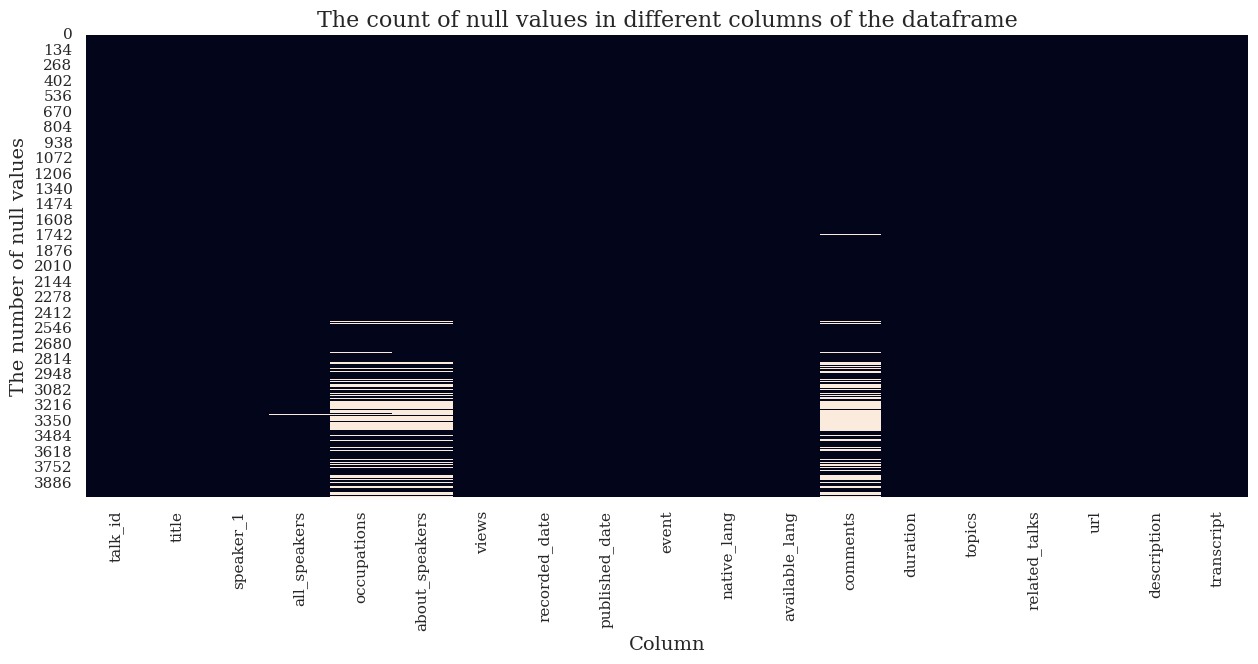

In [ ]:
# Graphical representation
plt.rcParams['figure.figsize'] = (15, 6)
ax = sns.heatmap(df.isnull(), cbar = False)
plt.xlabel("Column", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel("The number of null values", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The count of null values in different columns of the dataframe', fontname = 'serif', fontsize = 16)
plt.show()

### What insights have you gained about your dataset?

This dataset has 4005 rows and 19 columns with no duplicated values. It has significant missing values in three columns: 'comments', 'occupations', and 'about_speakers'. Some missing values are also present in the 'all_speakers' and 'recorded_date' columns. The dataset comprises 3 columns of data type int64, 1 column of data type float64, and 15 columns of data type object. Additionally, it includes two date columns, 'recorded_date' and 'published_date', which will be useful for our exploratory data analysis (EDA) process.


## **2. Understanding Your Variables**

In [ ]:
# Display the names of the columns in the dataset
# It returns the label of each column in the DataFrame
print(df.columns)

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')


In [ ]:
# Dataset Description
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Description of Variables

As mentioned earlier, the dataset has 4 integer columns. Therefore, we can view the maximum and minimum values of columns along with the 25th, 50th, and 75th percentiles.

We can observe that the minimum values of 'views' and 'comments' are both 0, indicating that nobody viewed or commented on some videos.

We can also view the counts of all the values.

### Check unique values for each variable

In [ ]:
# Check unique values for each variable
unique_values = df.nunique().reset_index()
unique_values

,index,0
0,talk_id,4005
1,title,4005
2,speaker_1,3274
3,all_speakers,3306
4,occupations,2049
5,about_speakers,2977
6,views,3996
7,recorded_date,1334
8,published_date,2962
9,event,459


## 3. **Data Wrangling**

### Data Wrangling Code

In [ ]:
# Write the code to prepare our dataset for analysis by removing null values from the 'occupations', 'all_speakers', and 'recorded_date' columns
df['occupations'].fillna(str({0: ['Other']}), inplace = True)
df['all_speakers'].fillna('', inplace = True)
df['recorded_date'].fillna('', inplace = True)

In [ ]:
# Drop the column 'about_speakers' due to its containing useless data
df['about_speakers'][0]

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

In [ ]:
# Drop the columns 'talk_id' and 'about_speakers'
df.drop(['talk_id','about_speakers'], axis = 1, inplace = True)

# Replace the comments with the average of comments
df['comments'].fillna(df['comments'].mean(), inplace = True)

In [ ]:
# Check the null values again
df.isnull().sum().reset_index()

,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


In [ ]:
# Change the format of the published_date
df['published_date'] = pd.to_datetime(df['published_date'], format='%Y-%m-%d')
# Split the published_date into other columns
df['release_day'] = df['published_date'].dt.weekday
df['release_month'] = df['published_date'].dt.month
df['release_year'] = df['published_date'].dt.year

In [ ]:
# Calculate the average views for each year
mean_views = df.groupby('release_year')['views'].mean().nlargest(15).reset_index()
mean_views

,release_year,views
0,2006,4.937003e+06
1,2013,3.012435e+06
2,2015,2.806775e+06
3,2016,2.734725e+06
4,2014,2.423564e+06
5,2012,2.196281e+06
6,2010,2.188767e+06
7,2017,2.160378e+06
8,2009,2.071610e+06
9,2019,1.939608e+06


In [ ]:
# Find the maximum views year-wise
total_views_yearly = df.groupby('release_year')['views'].sum().nlargest(15).reset_index()
total_views_yearly

,release_year,views
0,2019,1361604924
1,2018,871101863
2,2013,729009369
3,2017,680519097
4,2012,665473046
5,2016,661803437
6,2015,617490537
7,2014,581655293
8,2010,503416439
9,2011,492776405


In [ ]:
# Count the number of videos released each year
release_counts_yearly = df['release_year'].value_counts().nlargest(15).reset_index()
release_counts_yearly

,release_year,count
0,2019,702
1,2018,477
2,2017,315
3,2012,303
4,2011,255
5,2013,242
6,2016,242
7,2014,240
8,2010,230
9,2015,220


In [ ]:
# Create categorical columns to gain additional insights
weekday = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['release_day'] = df['release_day'].map(weekday)

### What manipulations have you executed, and what insights have you uncovered?

Inference:

1. First, we removed all the null values.

2. Next, we dropped all the unwanted columns.

3. We explored the 'published date' column because it holds significant insights.

4. In 2006, the highest average views were observed, followed by 2013 and 2015. The year 2020 recorded the lowest average views.

5. The year 2019 witnessed the highest views in TED Talk history, followed by 2018 and 2013. Conversely, 2020 had the lowest views due to insufficient data.

6. In terms of the number of released videos, 2019 saw the highest count, followed by 2018 and 2017. On the other hand, 2006 had the lowest release count, resulting in the highest average views for that year.

## **4. Data Visualization, Storytelling & Experimenting with Charts: Understanding the Relationships between Variables**

#### Chart 1

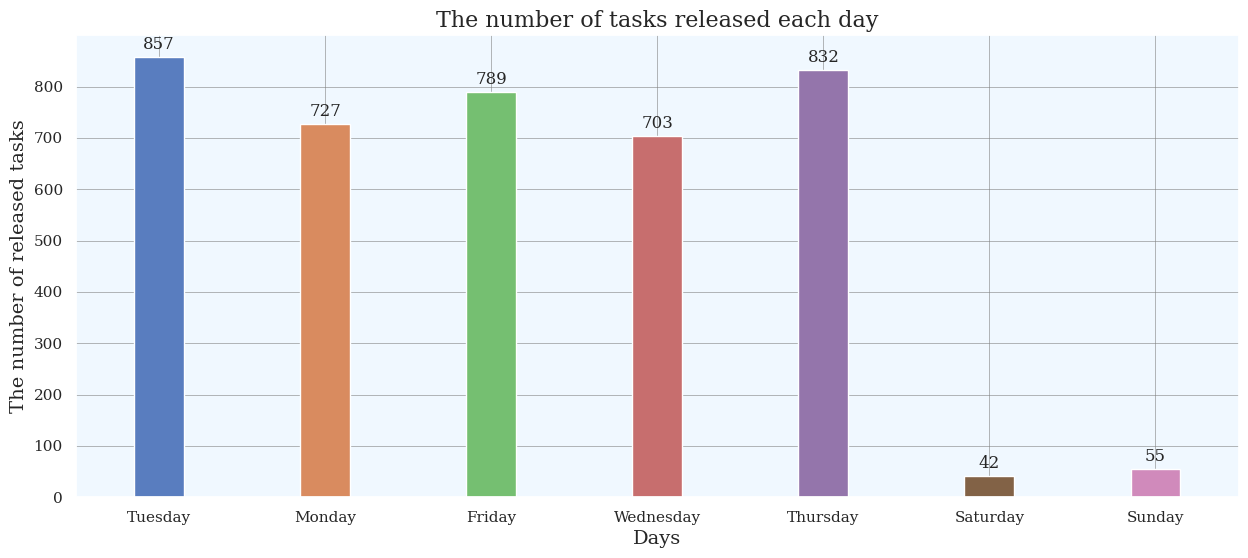

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_day', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Days", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of released tasks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of tasks released each day', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose the specific chart?

I chose the countplot from the Seaborn library because it can display the count of all the data in a bar chart.




##### 2. What insight(s) have been found from the chart?

Inference:

1. I observed the count of released videos across weekdays.

2. The highest number of videos were released on Tuesday, Thursday, and Friday.

3. Saturday and Sunday had the lowest count.

##### 3. Will the insights gained contribute to a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

TED Talk should consider increasing the release count on Saturdays and Sundays as well. There is no indication of negative growth in the business.

#### Chart 2

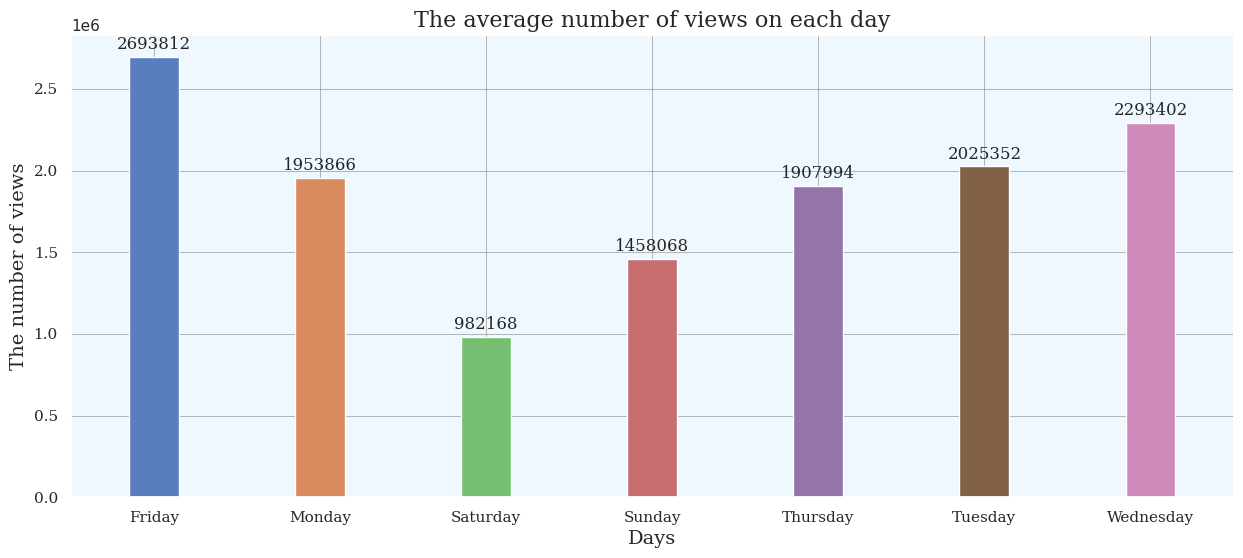

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
avg_views = df.groupby('release_day')['views'].mean().reset_index()
ax = sns.barplot(data = avg_views, x = 'release_day', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Days", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The average number of views on each day', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose the barplot from the Seaborn library because it can effectively display the average views for each day.

##### 2. What insight(s) have been derived from the chart?

Inference:

1. Friday sees the highest average number of views, likely due to the approaching weekend.

2. Despite having the maximum release count, Tuesday ranks third in average views, following Wednesday.

3. Saturday and Sunday, with the lowest release counts, also exhibit the lowest average views.

##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

TED Talk should consider increasing the release count on weekends so that people can also watch videos during that time. Given the comparison between the number of releases and average views, it appears that people are more inclined to watch videos on weekends.

In [ ]:
# Create categorical columns to gain further insights
number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['release_month'] = df['release_month'].replace(number, name)

#### Chart 3

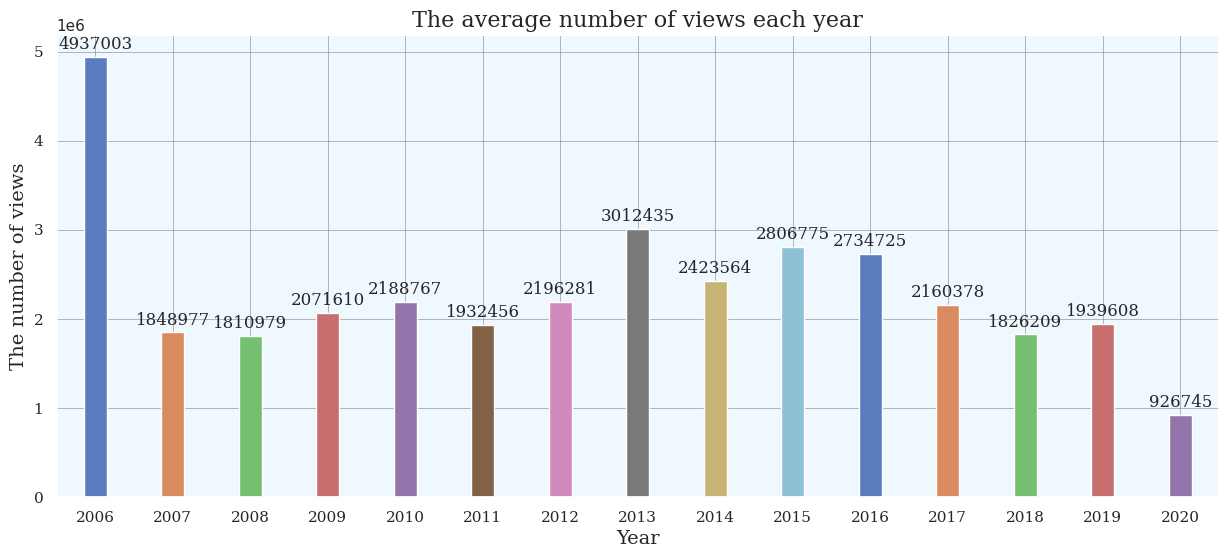

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
avg_views = df.groupby('release_year')['views'].mean().reset_index()
ax = sns.barplot(data = avg_views, x = 'release_year', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The average number of views each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose the point plot from Seaborn because it can effectively display the mean of a numeric variable for different levels of a categorical variable.


##### 2. What insight(s) have been derived from the chart?

1. In 2006, the highest average number of views was recorded, followed by 2013 and 2015.

2. Conversely, the year 2020 had the lowest average views.

##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

If we consider the business perspective, the mean views remain relatively consistent from 2007 to 2019. However, in 2013, there is a slight change observed. At some points, the views are declining due to the decrease in the number of released videos.

#### Chart 4

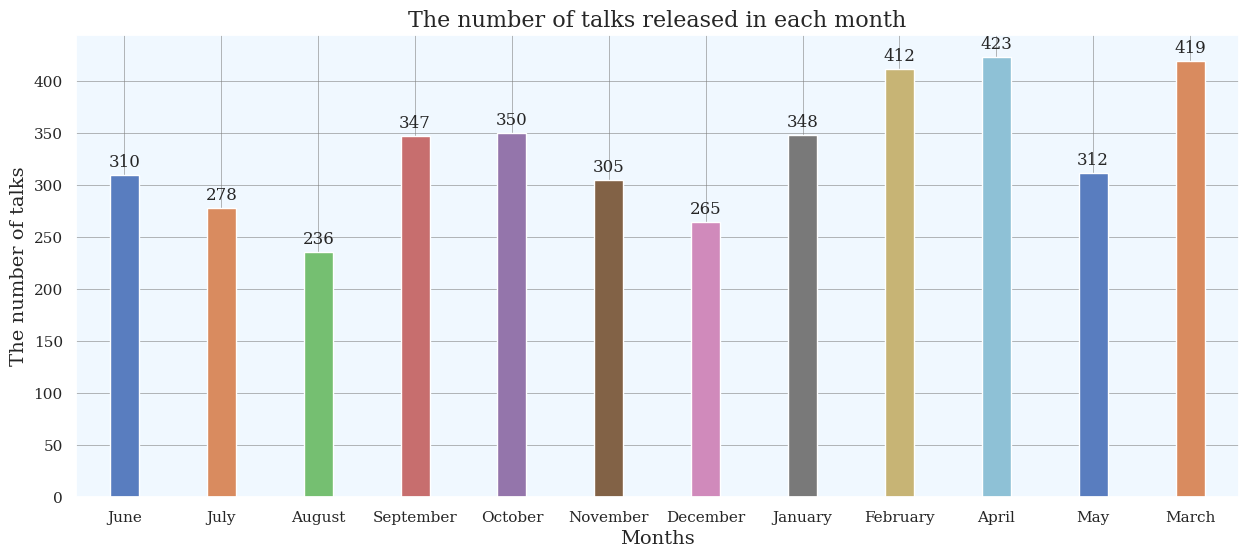

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_month', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Months", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of talks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of talks released in each month', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose the countplot from the Seaborn library because it provides the number of talks released in each month.

I attempted to display it using a horizontal bar chart.

##### 2. What insight(s) have been derived from the chart?

Inference:

1. April has the highest number of release counts, followed by February and March.

2. August and December have the lowest number of releases.


##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

TED Talk should consider increasing the release count in August and December as well.

#### Chart 5

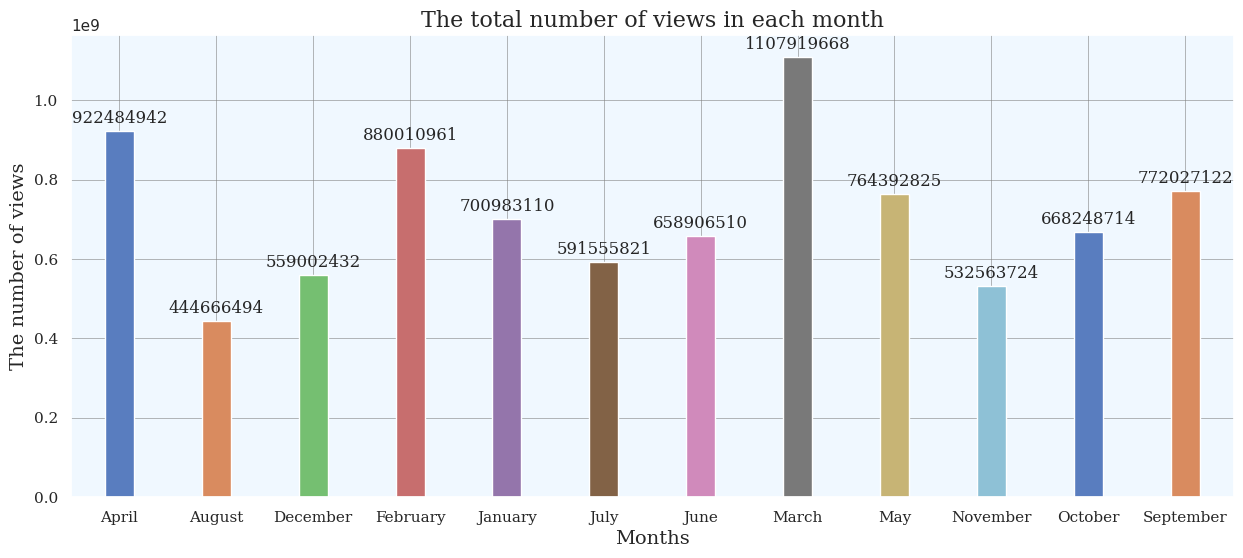

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
month_views = df.groupby('release_month')['views'].sum().reset_index()
ax = sns.barplot(data = month_views, x = 'release_month', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Months", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The total number of views in each month', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose a barplot to represent the total views with respect to each month.

##### 2. What insight(s) have been derived from the chart?

Inference:

1. March has the highest number of views and also a large number of released talks.

2. August has the least number of releases, resulting in fewer total views.

3. Despite March having fewer released talks, it yields better results in total views.

##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

TED Talk should conduct a survey to understand why March attracts a large viewership. By increasing the number of talks released in each month, they can potentially boost viewership across the board.

#### Chart 6

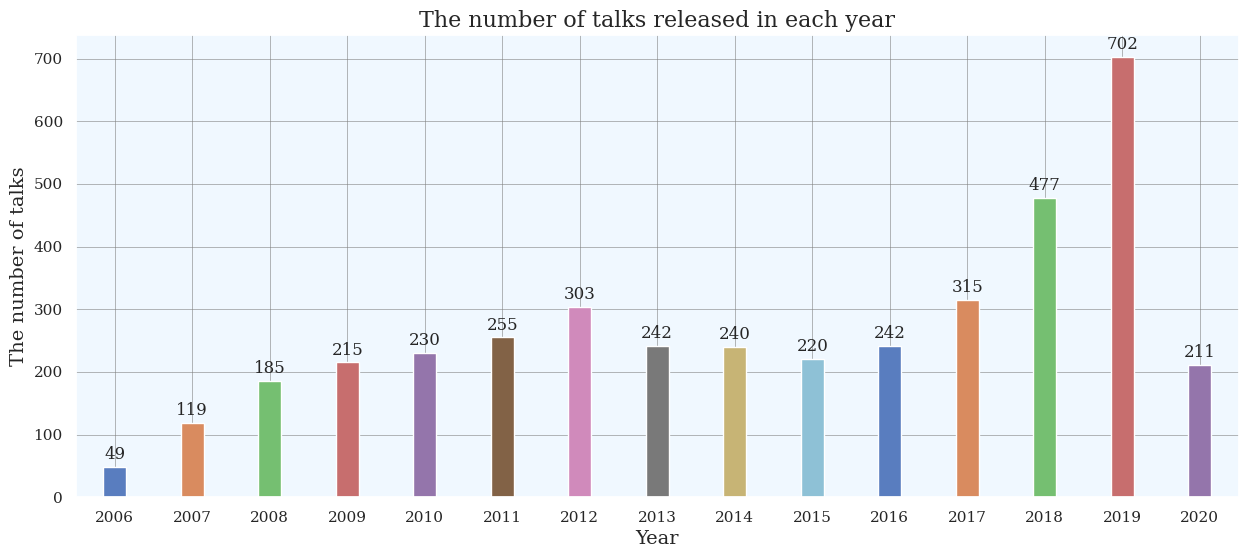

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.countplot(data = df, x = 'release_year', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of talks', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of talks released in each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

The countplot in the Seaborn library is used to create a count plot, which displays the count of observations for each category of a categorical variable.

##### 2. What insight(s) have been derived from the chart?

Inference:

1. In 2019, TED Talk had the maximum number of released videos, followed by 2018 and 2017.

2. With the fewest talks in 2006, it has the largest mean in views.

3. The number of talks is rapidly increasing from 2017 onwards.

##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

We can observe a rapid change in 2012.

#### Chart 7

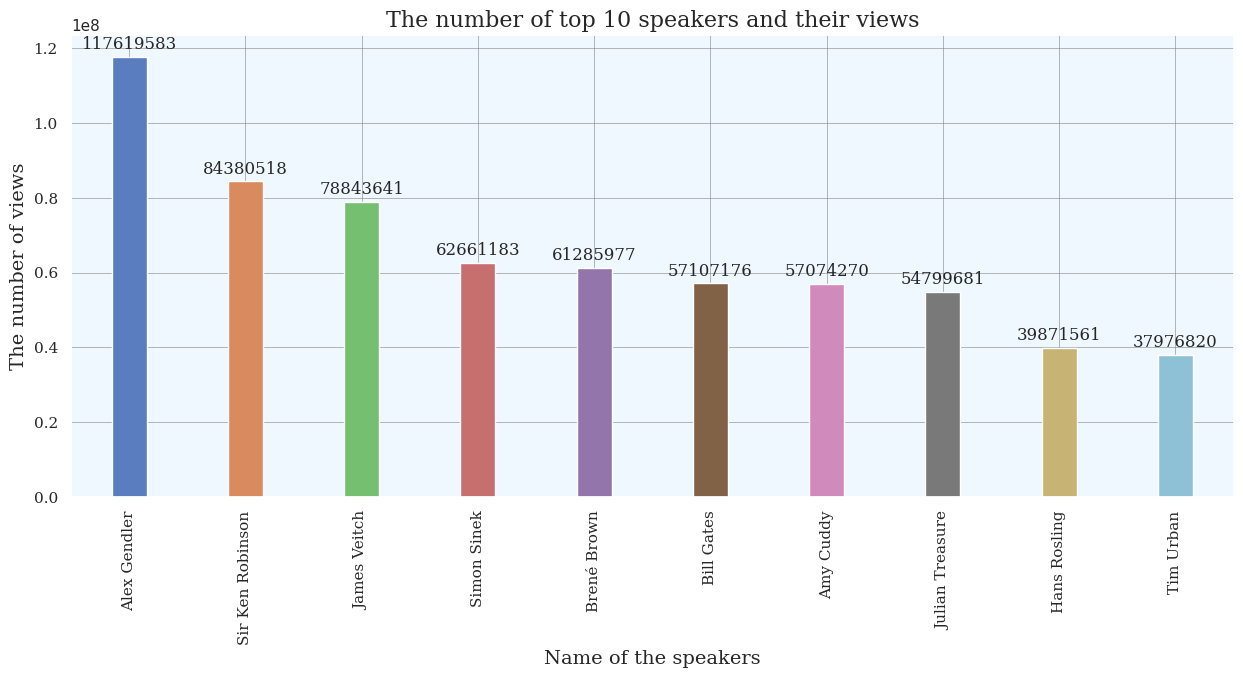

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_views = df.groupby('speaker_1')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(data = total_views, x = 'speaker_1', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the speakers", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of top 10 speakers and their views', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose a barplot from Seaborn because it can effectively display the sum of a numeric variable for different levels of a categorical variable.

##### 2. What insight(s) have been derived from the chart?

Inference:

1. With numerous speakers in TED Talk, I filtered out the top 10 speakers.

2. Alex Gendler has the most views in TED Talk history, suggesting significant influence. Sir Ken Robinson and James Veitch follow closely behind.

3. It's notable that Bill Gates is also among the top 10 speakers.

##### 3. Will the insights gained help in creating a positive business impact? Are there any insights suggesting negative growth? Justify with specific reasons.

TED Talk should consider inviting speakers who have a larger number of viewership repeatedly. After Alex Gendler, other speakers may not have the maximum releases, but they still garner significant viewership. Therefore, TED Talk should invite them again, as they are among the most popular speakers.

#### Chart 8

**WordCloud -** A word cloud is a visual representation of the most frequent words in a text, where the size of each word is proportional to its frequency. In Python, you can create a word cloud using the wordcloud library.

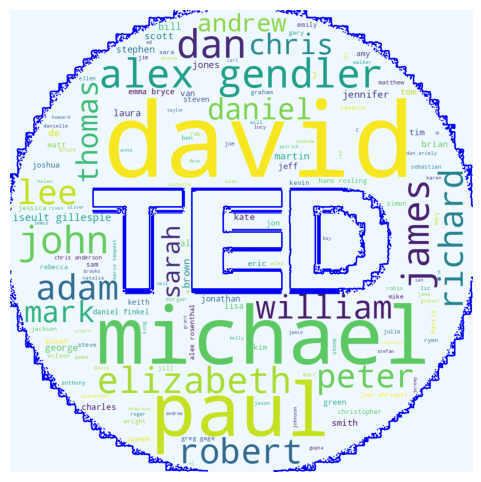

In [ ]:
# Visual representation
corpus = list(df['speaker_1'].values)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import requests
import io
response = requests.get("https://i2.wp.com/norfolkpl.org/wp-content/uploads/2019/01/ted-talk-logo.jpg?ssl=1")
image_bytes = io.BytesIO(response.content)
dataset = " ".join(corpus)
def create_word_cloud(string):

    maskArray = npy.array(Image.open(image_bytes))
    cloud = WordCloud(background_color = "aliceblue", max_words = 150, mask = maskArray, stopwords = set(STOPWORDS), contour_width = 3, contour_color = 'blue')
    cloud.generate(string)

    return cloud
dataset = dataset.lower()
wordcloud = create_word_cloud(dataset)
plt.figure(figsize = [15, 6])

# Image display
plt.imshow(wordcloud)

# To turn off the x and y axes
plt.axis('off')
plt.show()

##### 1. Why did you choose this particular chart?

A word cloud is a visual representation of the most frequent words in a text, where the size of each word is proportional to its frequency. In Python, you can create a word cloud using the wordcloud library.

##### 2. What insight or insights have been found from the chart?

Inference:

1. We can easily identify the most frequent names in the speaker list through these amazing visuals.

2. 'Michael,' 'David,' and 'Paul' are the most frequent words.

##### 3. Will the insights gained help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.

In a word cloud, we can easily see frequent words without using any function.

#### Chart 9

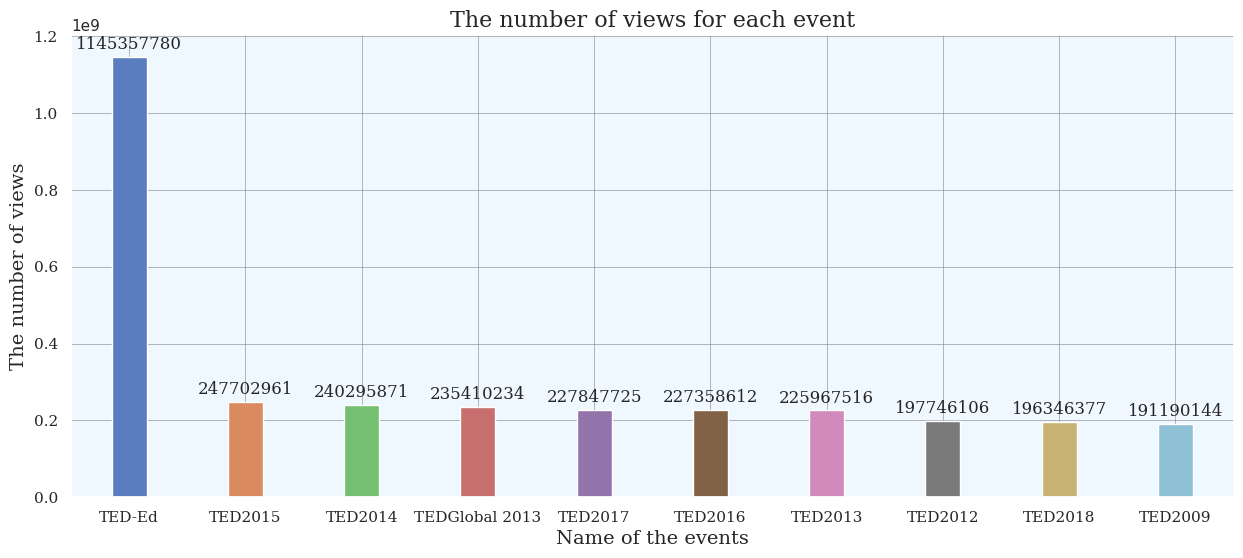

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
event_views = df.groupby('event')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(data = event_views, x = 'event', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the events", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of views for each event', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this particular chart?

I piI chose a barplot from Seaborn because it displays the count of a numeric variable for different levels of a categorical variable.

##### 2. What insight or insights have been found from the chart?

Inference:

1. TED-Ed has the maximum views, followed by TED2015 and TED2014.

2. Among the top 10, only TED-Ed has a significantly larger number of views, indicating a rapid change in views.

##### 3. Will the insights gained help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.

In TED talks, only TED Ed has the maximum views; therefore, TED talks should organize other events as well.

#### Chart 10

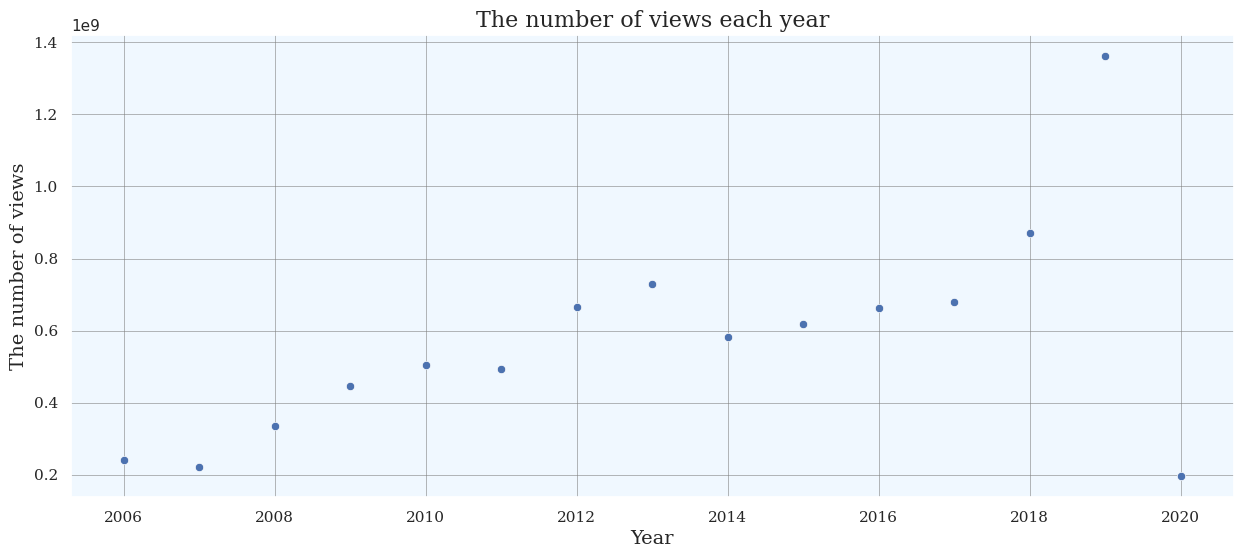

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_viewership = df.groupby('release_year')['views'].sum().reset_index()
ax = sns.scatterplot(data = total_viewership, x = "release_year", y = "views")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Year", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of views each year', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose that particular chart?

A scatter plot shows how two variables are related to each other; therefore, I used it.


##### 2. What insight or insights are found from the chart?

Inference:

1. In the scatter plot, it is evident that as the years progress, the total number of views also increases.

2. Year 2019 stands out with the highest views, while 2006 has fewer views, likely due to fewer releases.

##### 3. Will the insights gained help create a positive business impact? Are there any insights that indicate negative growth? Justify with specific reasons.

The viewership of TED talks is increasing, which will be beneficial for the TED talk business. They should take the same steps they took in the year 2019.

#### Chart 11

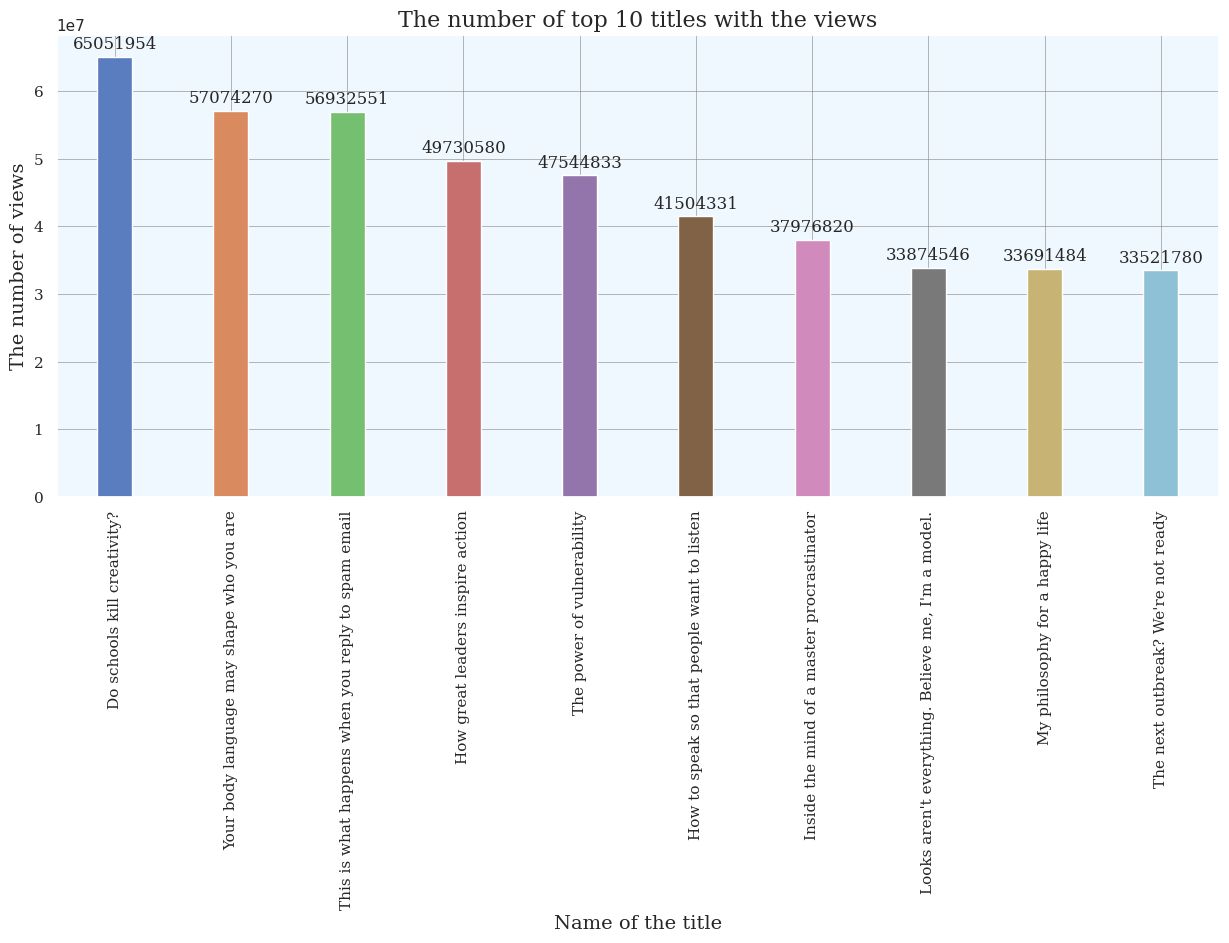

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
total_comments = df.groupby('title')['views'].sum().nlargest(10).reset_index()
ax = sns.barplot(x = 'title', y = 'views', data = total_comments, palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the title", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of top 10 titles with the views', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose a simple bar chart for a categorical variable and a continuous variable.

In [ ]:
total_comments

,title,views
0,Do schools kill creativity?,65051954
1,Your body language may shape who you are,57074270
2,This is what happens when you reply to spam email,56932551
3,How great leaders inspire action,49730580
4,The power of vulnerability,47544833
5,How to speak so that people want to listen,41504331
6,Inside the mind of a master procrastinator,37976820
7,"Looks aren't everything. Believe me, I'm a model.",33874546
8,My philosophy for a happy life,33691484
9,The next outbreak? We're not ready,33521780


##### 2. What insight or insights have been found from the chart?

Inference:

1. People liked the topic 'Do schools kill creativity?' the most.

2. The topics 'Your body language may shape who you are' and 'This is what happens when you reply to spam email' were liked the most.

##### 3. Will the insights gained help create a positive business impact? Are there any insights that indicate negative growth? Justify with specific reasons.

TED talks should focus on these types of topics for more business.

These topics are the most effective.

#### Chart 12

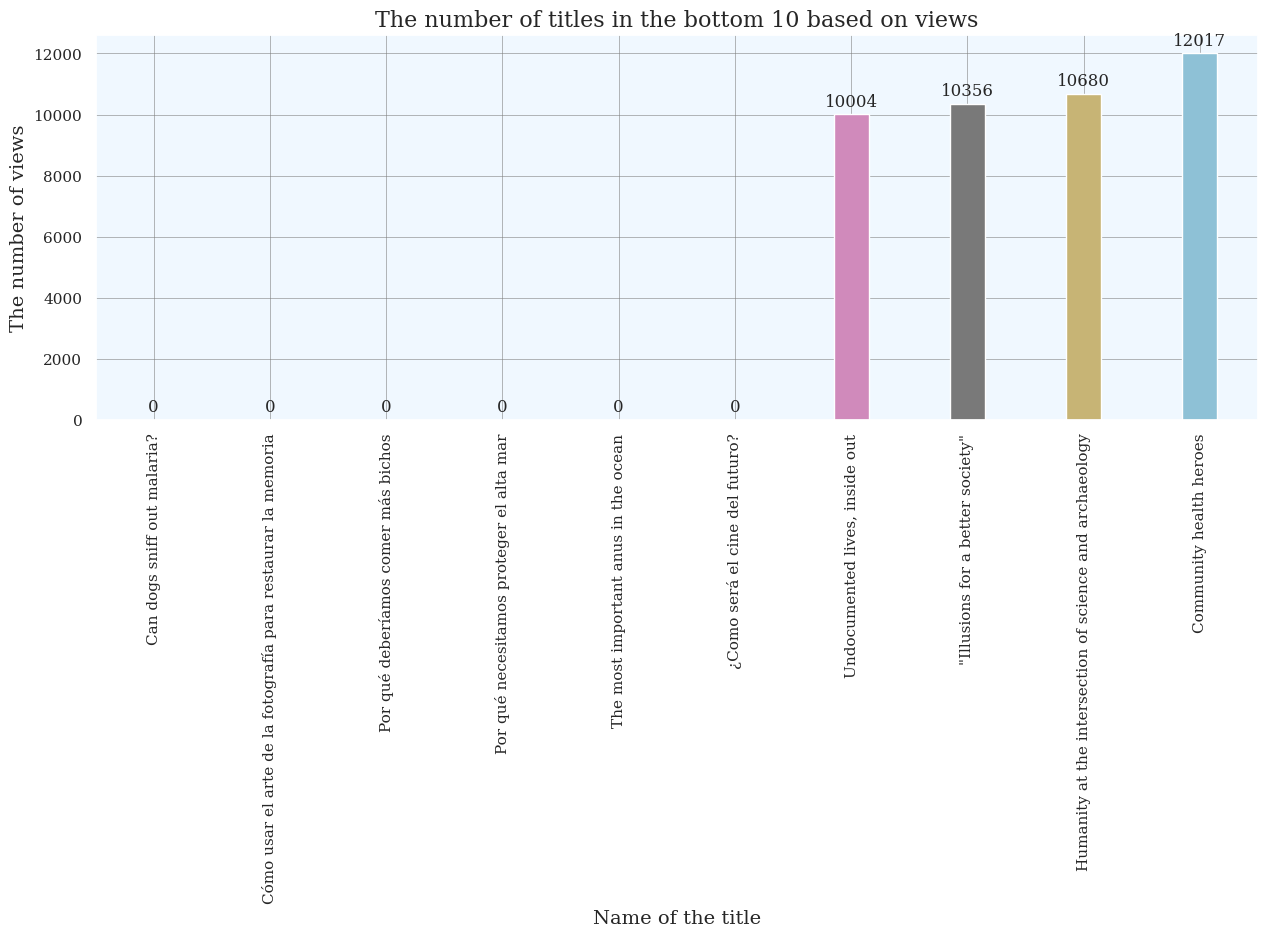

In [ ]:
# Graphical representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 5)
colors = sns.color_palette("muted")
less_effective_title = df.groupby('title')['views'].sum().nsmallest(10).reset_index()
ax = sns.barplot(data = less_effective_title, x = 'title', y = 'views', palette = colors, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the title", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The number of views', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The number of titles in the bottom 10 based on views', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
less_effective_title

,title,views
0,Can dogs sniff out malaria?,0
1,Cómo usar el arte de la fotografía para restau...,0
2,Por qué deberíamos comer más bichos,0
3,Por qué necesitamos proteger el alta mar,0
4,The most important anus in the ocean,0
5,¿Como será el cine del futuro?,0
6,"Undocumented lives, inside out",10004
7,"""Illusions for a better society""",10356
8,Humanity at the intersection of science and ar...,10680
9,Community health heroes,12017


##### 1. Why did you select this particular chart?

I chose a simple bar chart for a categorical variable and a continuous variable.

##### 2. What insight or insights have been found from the chart?

Inference:

1. These are the least effective topics in TED Talk history.

2. We found that mostly they are in non-English languages, indicating that the English language is the most effective.

##### 3. Will the insights gained help create a positive business impact? Are there any insights that indicate negative growth? Justify with specific reasons.

For increasing the business of TED talks, they should focus on non-English content because it is less effective.

#### Chart 13: Correlation Heatmap

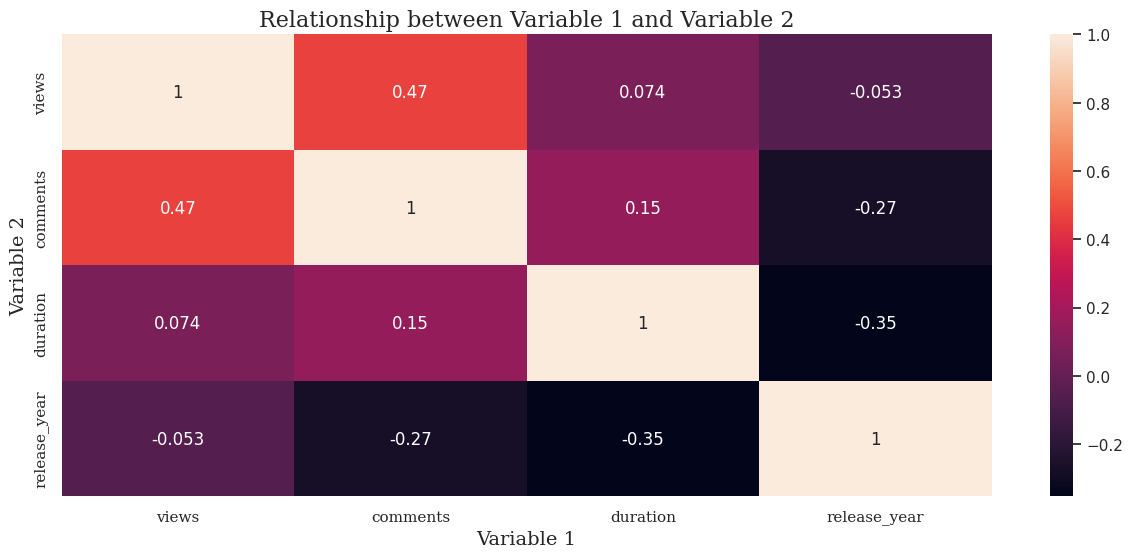

In [ ]:
plt.figure(figsize = (15, 6))
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include = 'number')

sns.heatmap(numeric_df.corr(), annot = True)
plt.xlabel("Variable 1", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Variable 2', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Relationship between Variable 1 and Variable 2', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?

I chose the heatmap() function, which is used to visualize the correlation between all features in matrix format.

##### 2. What insight or insights have been found from the chart?

Inference:

Comments and views are highly correlated to each other, indicating that if one variable increases, the other also increases.

#### Chart 14

**Pair Plot -** It is a function in the Seaborn library in Python used to create a matrix of scatter plots for visualizing the relationships between multiple variables in a dataset.

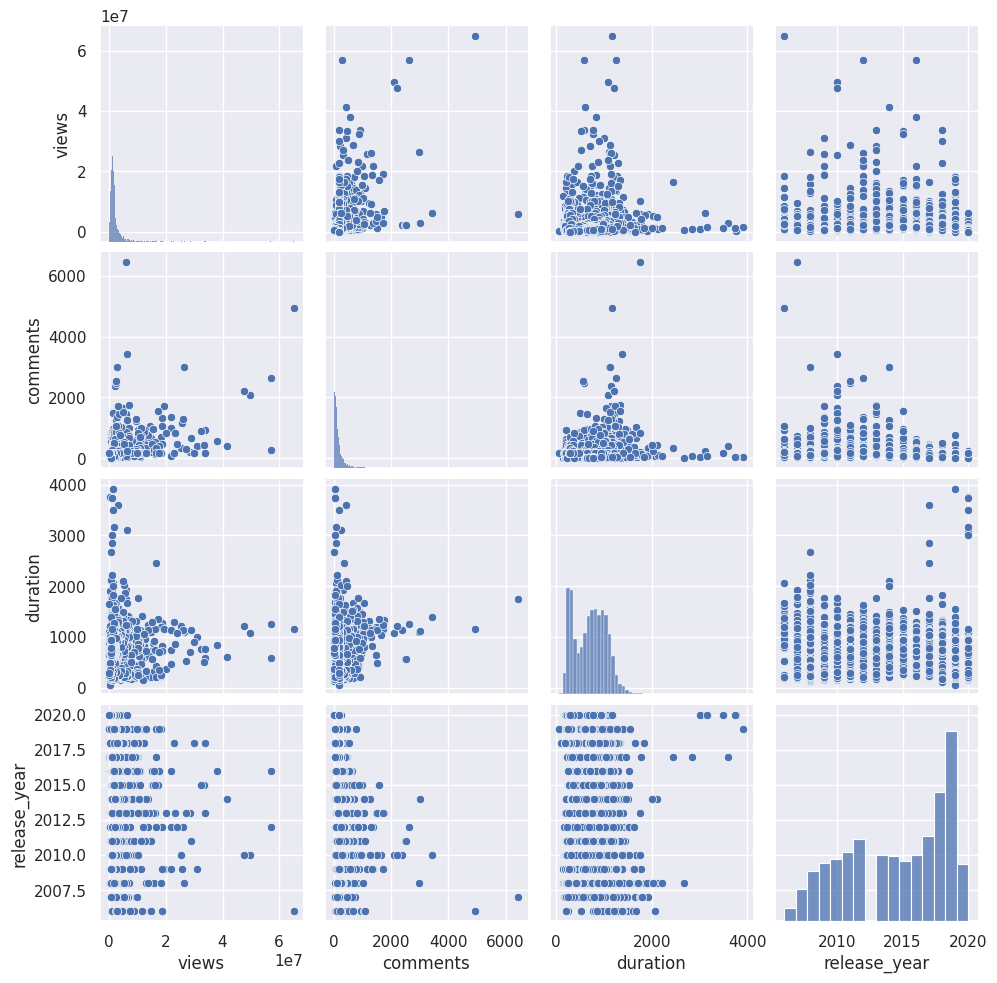

In [ ]:
# Pair plot representation
sns.pairplot(df)
plt.show()

##### 1. Why did you choose this specific chart?

Pairplot is a function in the Seaborn library in Python used to create a matrix of scatter plots for visualizing the relationships between multiple variables in a dataset.

##### 2. What insight or insights have been found from the chart?

Inference:

We can observe how the data is scattered in relation to each other.

## **5. Feature Engineering and Data Pre-processing**

### 1. Handling Missing Values

In [ ]:
# Handling missing values and missing value imputation
df.isnull().sum().reset_index()

,index,0
0,title,0
1,speaker_1,0
2,all_speakers,0
3,occupations,0
4,views,0
5,recorded_date,0
6,published_date,0
7,event,0
8,native_lang,0
9,available_lang,0


#### Which missing value imputation techniques have you used, and why did you use those techniques?

We have already addressed missing values during the EDA phase. Initially, we identified missing values in five columns. For columns with fewer than five missing values, we replaced them with the most frequent values. For others, we utilized the `fillna` method. In numerical columns, we replaced missing values with the mean of the column. These were the methods used to handle null values.

### 2. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
# Manipulate features to minimize feature correlation and create new features. Create a new feature: average views by speaker
mean_encoding = df.groupby('speaker_1')['views'].mean().to_dict()
df['avg_views_by_speaker'] = df['speaker_1'].map(mean_encoding)

In [ ]:
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis = 1)
for index, row in df.iterrows():
    occup_list = list(row['occupations'].values())[0][0]
    df.loc[index, 'occupation'] = str(occup_list)

In [ ]:
# Create a new feature: average views by event
mean_encoding_event = df.groupby('event')['views'].mean().to_dict()
df['avg_views_by_event'] = df['event'].map(mean_encoding_event)

# Create a new feature: total languages
df['total_lang'] = df.apply(lambda x: len(x['available_lang']), axis = 1)

# Create a new feature: number of topics
df['no_of_topics'] = df.apply(lambda x: len(x['topics']), axis = 1)

# Create a new feature: age of video
df['video_age'] = 2022 - df['release_year']

In [ ]:
# Select your features wisely to avoid overfitting. Check all the columns
df.columns

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'views',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'release_day', 'release_month',
       'release_year', 'avg_views_by_speaker', 'occupation',
       'avg_views_by_event', 'total_lang', 'no_of_topics', 'video_age'],
      dtype='object')

In [ ]:
# Drop all unnecessary columns
df.drop(columns = ['title', 'all_speakers', 'recorded_date', 'release_year', 'topics', 'available_lang', 'event', 'speaker_1', 'url', 'transcript', 'description', 'native_lang', 'occupations', 'occupation', 'published_date', 'related_talks'], inplace = True, axis = 1)


In [ ]:
# Display the top 5 rows of the remaining columns
df.head()

,views,comments,duration,release_day,release_month,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age
0,3523392,272.0,977,Tuesday,June,2.190599e+06,3.876291e+06,270,134,16
1,14501685,628.0,1190,Tuesday,June,3.987156e+06,3.876291e+06,303,138,16
2,1920832,124.0,1286,Tuesday,June,2.156190e+06,3.876291e+06,165,123,16
3,2664069,219.0,1116,Tuesday,June,1.979411e+06,3.876291e+06,219,116,16
4,65051954,4931.0,1164,Tuesday,June,2.812684e+07,3.876291e+06,387,84,16


##### What all feature selection methods have you used  and why?Which feature selection methods have you used, and why?

1. We created some features using normal Python functions.

2. We dropped some unwanted features.

3. We will perform feature selection after removing outliers.

#### 3. **Outlier -** An outlier is a data item or object that significantly deviates from the rest of the (so-called normal) objects. They can result from measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. An outlier is defined as any point of data that lies over 1.5 IQRs (Inter Quartile Range) below the first quartile (Q1) or above the third quartile (Q3) in a data set. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [ ]:
# Display the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   views                 4005 non-null   int64  
 1   comments              4005 non-null   float64
 2   duration              4005 non-null   int64  
 3   release_day           4005 non-null   object 
 4   release_month         4005 non-null   object 
 5   avg_views_by_speaker  4005 non-null   float64
 6   avg_views_by_event    4005 non-null   float64
 7   total_lang            4005 non-null   int64  
 8   no_of_topics          4005 non-null   int64  
 9   video_age             4005 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 297.4+ KB


**Box Plot -** A Box Plot is created to display a summary of the set of data values, including properties such as minimum, first quartile, median, third quartile, and maximum. In the box plot, a box is drawn from the first quartile to the third quartile, with a vertical line representing the median. The x-axis denotes the data to be plotted, while the y-axis shows the frequency distribution.

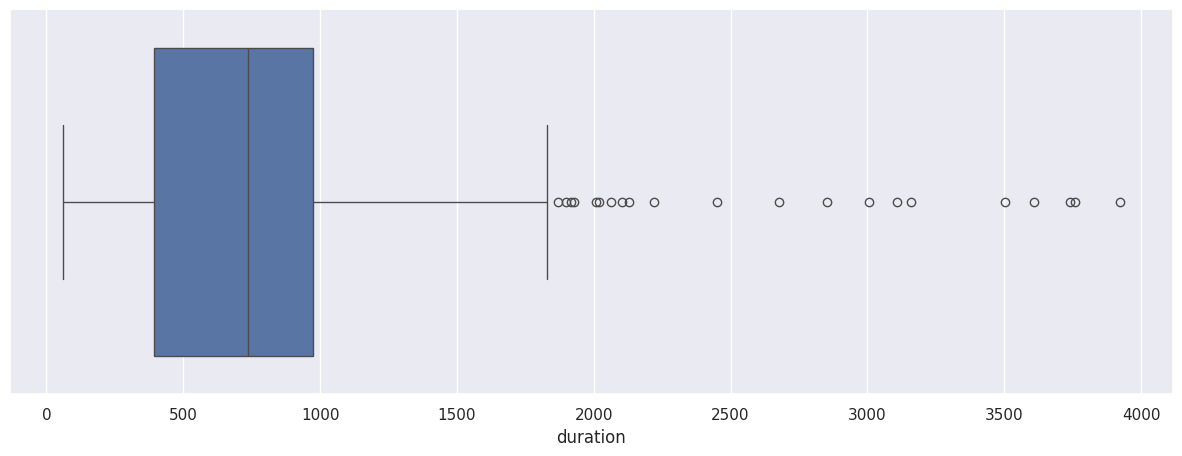

In [ ]:
# Box plot representation
sns.boxplot(data = df, x = 'duration')
plt.show()

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = 'number')

# Q1 is the first quartile (lower quartile)
Q1 = numeric_df.quantile(0.25)

# Q3 is the third quartile (upper quartile)
Q3 = numeric_df.quantile(0.75)

# IQR stands for Interquartile Range, which equals Q3 minus Q1
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
outlier1 = Q1 - 1.5 * IQR
outlier2 = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((numeric_df < outlier1) | (numeric_df > outlier2)).sum()
outliers_count

views                   393
comments                361
duration                 21
avg_views_by_speaker    373
avg_views_by_event      156
total_lang              143
no_of_topics            143
video_age                 0
dtype: int64

In [ ]:
# Replace outliers with the 25th percentile and 75th percentile
for i in ['avg_views_by_event', 'avg_views_by_speaker', 'comments', 'duration', 'no_of_topics', 'total_lang', 'views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  df[i] = np.where(df[i] < (Q1 - 1.5*IQR), (Q1 - 1.5*IQR), np.where(df[i] > (Q3 + 1.5*IQR), (Q3 + 1.5*IQR), df[i]))

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include = 'number')

# Calculate quartiles and interquartile range (IQR)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
outlier1 = Q1 - 1.5 * IQR
outlier2 = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((numeric_df < outlier1) | (numeric_df > outlier2)).sum()
outliers_count

views                   0
comments                0
duration                0
avg_views_by_speaker    0
avg_views_by_event      0
total_lang              0
no_of_topics            0
video_age               0
dtype: int64

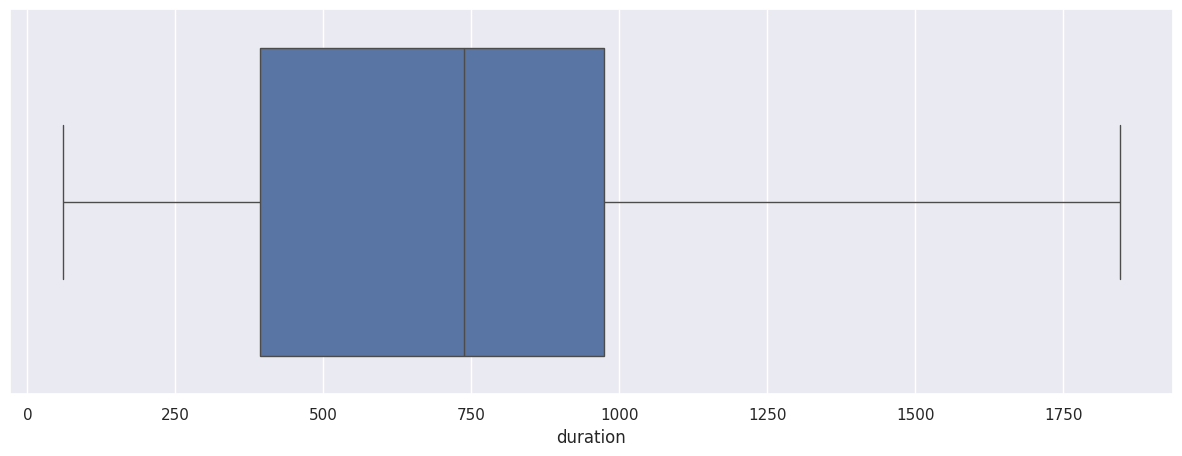

In [ ]:
# In the boxplot for the same column, we figured out that there are outliers that need to be removed from the duration column
sns.boxplot(data = df, x = 'duration')
plt.show()

##### Which outlier treatment techniques have you used, and why did you use those techniques?

The box plot is one of the best methods for identifying outliers in particular features. Outliers that are less than the 25th percentile are replaced with the 25th percentile value, while outliers that are greater than the 75th percentile are replaced with the 75th percentile value.

### 4. Categorical Encoding

In [ ]:
# Separate the dependent and independent variables
x = df.drop(columns = 'views')
y = df['views']

In [ ]:
# Encode your categorical columns
x = pd.get_dummies(x)
x.head(2)

,comments,duration,avg_views_by_speaker,avg_views_by_event,total_lang,no_of_topics,video_age,release_day_Friday,release_day_Monday,release_day_Saturday,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,272.0,977.0,2190599.25,3.778944e+06,270.0,134.0,16,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,336.0,1190.0,3987156.10,3.778944e+06,294.0,138.0,16,False,False,False,...,False,False,False,False,True,False,False,False,False,False


#### Which categorical encoding techniques have you used, and why did you use those techniques?

1. pd.get_dummies() is a function in the pandas library in Python used to convert categorical variables into dummy or indicator variables. This process is also known as one-hot encoding.

2. In one-hot encoding, a categorical variable is transformed into a binary matrix where each column represents a category, and each row represents an observation. Each cell in the matrix is filled with a binary value of 1 or 0 indicating the presence or absence of a particular category in that observation.

### 5. Feature  Selection

In [ ]:
# Select features wisely to prevent overfitting
# The F-Score method is a filter feature selection method that examines the relationship between each descriptor
f_scores = f_regression(x, y)
f_scores[1]

array([9.90841321e-159, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
       5.81214882e-185, 4.71158966e-002, 3.94142602e-001, 2.51061953e-012,
       1.43491232e-001, 3.85368618e-005, 2.73265521e-004, 3.98310726e-002,
       2.13786984e-001, 9.42649939e-001, 3.53875418e-002, 4.66867525e-001,
       7.41463988e-002, 3.39945041e-001, 5.74106856e-002, 2.06942978e-001,
       4.02649944e-001, 5.32863676e-004, 6.73443607e-002, 7.15013746e-002,
       9.72823723e-003, 2.07117470e-001])

**P-value -** It is the level of marginal significance within a statistical hypothesis test, representing the probability of the occurrence of a given event. A large P-value implies that sample scores are more aligned or similar to the population score.

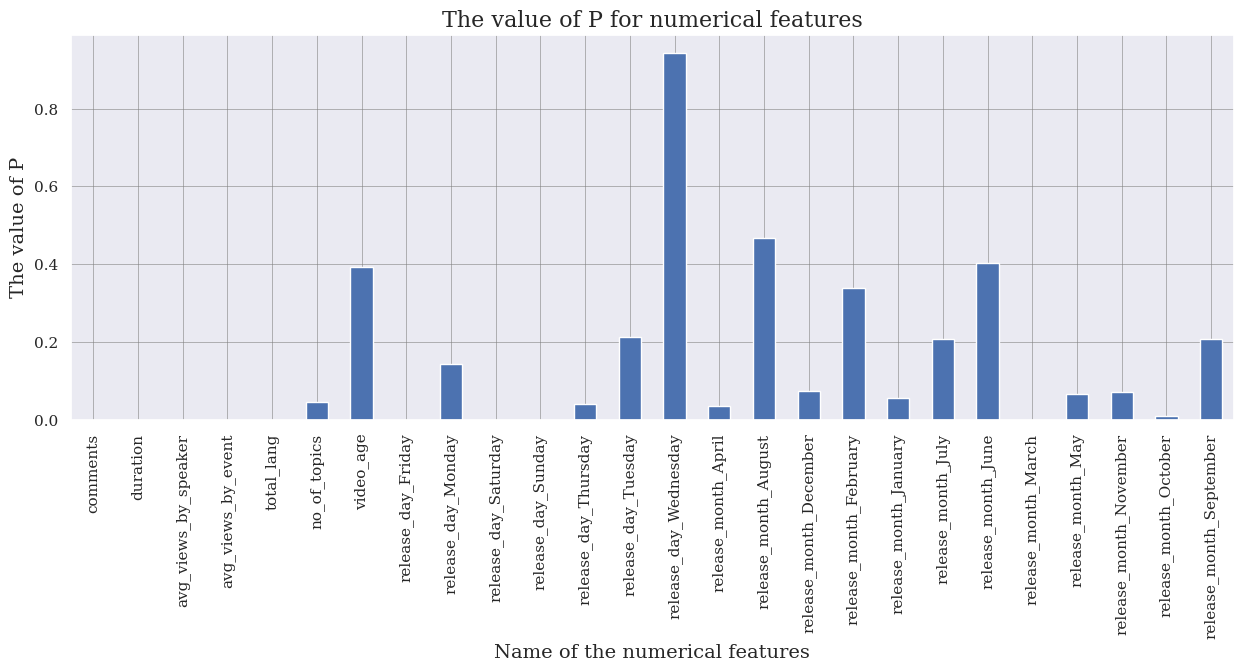

In [ ]:
# Graphical representation
plt.rcParams['figure.figsize'] = (15, 5)
p_values = pd.Series(f_scores[1], index = x.columns)
p_values.plot(kind = 'bar')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Name of the numerical features", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('The value of P', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The value of P for numerical features', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Select p-values less than 0.005
selected_features = np.where(p_values < 0.005)[0]
x = x.iloc[0:, selected_features]

**VIF -** It is used to detect the presence of multicollinearity. Variance inflation factors (VIF) measure how much the variance of the estimated regression coefficients is inflated compared to when the predictor variables are not linearly related.

In [ ]:
# Calculate the VIF for the best feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [ ]:
# Select only numeric columns for VIF calculation
numeric_df = df.select_dtypes(include = 'number')

# Calculate VIF
calc_vif(numeric_df)

,variables,VIF
0,views,17.780903
1,comments,4.226819
2,duration,6.949656
3,avg_views_by_speaker,17.178675
4,avg_views_by_event,9.496768
5,total_lang,19.613244
6,no_of_topics,4.940827
7,video_age,10.710599


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

# Check if 'total_lang' exists in the DataFrame before dropping it
if 'total_lang' in x.columns:
    x.drop('total_lang', axis=1, inplace=True)
else:
    print("Column 'total_lang' does not exist in the DataFrame.")

# Select only numeric columns for VIF calculation
numeric_df = x.select_dtypes(include='number')

# Calculate VIF
calc_vif(numeric_df)


,variables,VIF
0,comments,3.387027
1,duration,3.932354
2,avg_views_by_speaker,4.276523
3,avg_views_by_event,5.909985


##### Which feature selection methods have you used, and why did you use those methods?

**Feature_selection -** The function returns the F-value and p-value of the linear regression test for each feature in the dataset, which can be used to select the features with the highest F-value and lowest p-value.

VIF is a statistical measure used to assess the degree of multicollinearity in a multiple regression model. Multicollinearity occurs when there is a high correlation between independent variables (also called predictor variables or features) in a regression model.

In [ ]:
print(x.columns)

Index(['comments', 'duration', 'avg_views_by_speaker', 'avg_views_by_event',
       'release_day_Friday', 'release_day_Saturday', 'release_day_Sunday',
       'release_month_March'],
      dtype='object')


##### Which features did you find important, and why?

These are the features that we can use in creating a model. We removed multicollinear features and, with feature_selection, we found the P-value.

### 6. **Data Splitting -** It is the act of partitioning available data into two portions, usually for cross-validation purposes. One portion of the data is used to develop a predictive model, and the other is used to evaluate the model's performance.

In [ ]:
# Split our data into train and test sets. Choose the splitting ratio wisely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [ ]:
# Size of the training data
x_train.shape

(2803, 8)

In [ ]:
# Size of the test data
x_test.shape

(1202, 8)

##### What data splitting ratio did you use, and why?

I took 30% of the data as test data because it will be helpful for creating a better model. If your dataset is small, you may want to use a larger test size to ensure that the test set is representative of the overall population.

## **6. ML Model Implementation**

#### **1. Linear Regression -** It shows a linear relationship between one or more independent (X) variables and a dependent (y) variable, hence it's called linear regression. Since linear regression models the linear relationship, it finds how the value of the dependent variable changes according to the value of the independent variable(s).








In [ ]:
# Implement linear regression
reg = LinearRegression().fit(x_train, y_train)

# Fit the linear regression algorithm
reg.fit(x_train, y_train)

# Make predictions using linear regression
y_pred = reg.predict(x_test)

#### Explain the performance of linear regression using evaluation metric score charts


In [ ]:
# Display the evaluation metric score chart for linear regression
# By using the mean_absolute_error() function
Mean_Absolute_Error_Value_of_Linear_Regression = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error value of Linear Regression: ", Mean_Absolute_Error_Value_of_Linear_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Linear_Regression = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Value of Linear Regression: ", Mean_Squared_Error_Value_of_Linear_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Linear_Regression = np.sqrt(Mean_Squared_Error_Value_of_Linear_Regression)
print("Root Mean Square Error Value of Linear Regression: ", Root_Mean_Square_Error_Value_of_Linear_Regression)

# By using the r2_score() function
R_Squared_Value_of_Linear_Regression = r2_score(y_test, y_pred)
print("R Squared Value of Linear Regression: ", R_Squared_Value_of_Linear_Regression)

# Adjusted R-squared formula: \(1 - \frac{(1-R^2) \times (n-1)}{n-p-1}\)
Adjusted_R_Squared_Value_of_Linear_Regression = 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Linear Regression:", Adjusted_R_Squared_Value_of_Linear_Regression)

Mean Absolute Error value of Linear Regression:  260752.21899696472
Mean Squared Error Value of Linear Regression:  234841173869.58383
Root Mean Square Error Value of Linear Regression:  484604.1414077926
R Squared Value of Linear Regression:  0.7959370600323038
Adjusted R Squared Value of Linear Regression: 0.7945686580878432


##### Have you observed any improvements? Record the improvements with the updated evaluation metric score chart.

The evaluation metrics used for linear regression are:

**1. Mean Absolute Error Value -** It is calculated as the average of the absolute differences between the predicted values and the true values.

**2. Mean Squared Error Value -** It is calculated as the average of the squared differences between the predicted values and the true values.

**3. Root Mean Square Error Value -** It is calculated as the square root of the average of the squared differences between the predicted values and the true values.

**4. R Squared Value -** It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

**5. Adjusted R Squared Value -** It is a better metric to use when comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables.

In [ ]:
# Display the values of the DataFrame_of_Linear_Regression using pd.DataFrame for linear regression
Dataframe_of_Linear_Regression = pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])
print(Dataframe_of_Linear_Regression)

         actual          pred
0     1559970.0  1.526645e+06
1     1524453.0  1.384209e+06
2      779329.0  7.369715e+05
3     4004739.0  2.504141e+06
4     4000351.0  3.640626e+06
...         ...           ...
1197  1146861.0  1.012874e+06
1198  4009671.5  3.787180e+06
1199  1601998.0  1.510542e+06
1200  1724019.0  1.820843e+06
1201  1753602.0  1.891026e+06

[1202 rows x 2 columns]


#### 2. **Cross-Validation & Hyperparameter Tuning -** It is used when we need to compare the efficiency of various hyperparameter settings throughout the tuning process. The model is trained and tested for each possible hyperparameter setting, and the results are summarized over k iterations to provide an overall performance score.

#### **2. Lasso Regression -** It is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

In [ ]:
# Implement Lasso Regression
lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100, 110, 120, 150, 160, 170, 200]}

# Fit the Lasso Regression algorithm
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)
lasso = Lasso(alpha = 200, max_iter =  3000)
lasso.fit(x_train, y_train)

# Make predictions using Lasso Regression
y_pred_lasso = lasso_regressor.predict(x_test)

In [ ]:
# Display the evaluation metric score chart for Lasso Regression.
# By using the mean_absolute_error() function
Mean_Absolute_Error_Value_of_Lasso_Regression = mean_absolute_error(y_test,y_pred_lasso)
print("Mean Absolute Error Value of Lasso Regression: ", Mean_Absolute_Error_Value_of_Lasso_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Lasso_Regression = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error Value of Lasso Regression: ", Mean_Squared_Error_Value_of_Lasso_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Lasso_Regression = np.sqrt(Mean_Squared_Error_Value_of_Lasso_Regression)
print("Root Mean Square Error Value of Lasso Regression: ", Root_Mean_Square_Error_Value_of_Lasso_Regression)

# By using the r2_score() function
R_Squared_Value_of_Lasso_Regression = r2_score(y_test, y_pred_lasso)
print("R Squared Value of Lasso Regression: ", R_Squared_Value_of_Lasso_Regression)

# Adjusted R-squared formula: \(1 - \frac{(1-R^2) \times (n-1)}{n-p-1}\)
Adjusted_R_Squared_Value_of_Lasso_Regression = 1 - (1 - r2_score((y_test), (y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Lasso Regression: ", Adjusted_R_Squared_Value_of_Lasso_Regression)

Mean Absolute Error Value of Lasso Regression:  260508.8263454157
Mean Squared Error Value of Lasso Regression:  234761921364.77924
Root Mean Square Error Value of Lasso Regression:  484522.36415337864
R Squared Value of Lasso Regression:  0.796005925720819
Adjusted R Squared Value of Lasso Regression:  0.7946379855747725


##### Have you observed any improvements? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

Upon comparing linear regression and lasso regression, we found that lasso regression gives us a slightly better result. Therefore, we can consider lasso regression as the better model.

In [ ]:
# Display the values of the DataFrame_of_Lasso_Regression using pd.DataFrame for Lasso Regression
Dataframe_of_Lasso_Regression = pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])
Dataframe_of_Lasso_Regression

,actual,pred
0,1559970.0,1.525363e+06
1,1524453.0,1.384283e+06
2,779329.0,7.364857e+05
3,4004739.0,2.504300e+06
4,4000351.0,3.641089e+06
...,...,...
1197,1146861.0,1.012843e+06
1198,4009671.5,3.787086e+06
1199,1601998.0,1.510228e+06
1200,1724019.0,1.820059e+06


#### **3. Ridge Regression -** It is a model tuning method used to analyze data suffering from multicollinearity. When multicollinearity occurs, least squares are unbiased, but variances are large, resulting in predicted values being far from the actual values.

In [ ]:
# Implement Ridge Regression
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}

# Fit the Ridge Regression algorithm
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x_train, y_train)

# Make predictions using Ridge Regression
y_pred_ridge = ridge_regressor.predict(x_test)

In [ ]:
# Display the evaluation metric score chart for Ridge Regression
# By using the mean_absolute_error() function
Mean_Absolute_Error_Value_of_Ridge_Regression = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error Value of Ridge Regression: ", Mean_Absolute_Error_Value_of_Ridge_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Ridge_Regression = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error Value of Ridge Regression: ", Mean_Squared_Error_Value_of_Ridge_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Ridge_Regression = np.sqrt(Mean_Squared_Error_Value_of_Ridge_Regression)
print("Root Mean Square Error Value of Ridge Regression: ", Root_Mean_Square_Error_Value_of_Ridge_Regression)

# By using the r2_score() function
R_Squared_Value_of_Ridge_Regression = r2_score(y_test, y_pred_ridge)
print("R Squared Value of Ridge Regression: ", R_Squared_Value_of_Ridge_Regression)

# Adjusted R-squared formula: \(1 - \frac{(1-R^2) \times (n-1)}{n-p-1}\)
Adjusted_R_Squared_Value_of_Ridge_Regression = 1 - (1 - r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Ridge Regression: ", Adjusted_R_Squared_Value_of_Ridge_Regression)


Mean Absolute Error Value of Ridge Regression:  259469.30334901332
Mean Squared Error Value of Ridge Regression:  234348424577.73996
Root Mean Square Error Value of Ridge Regression:  484095.4705197519
R Squared Value of Ridge Regression:  0.7963652297075946
Adjusted R Squared Value of Ridge Regression:  0.7949996989763798


##### Have you observed any improvements? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

Here, Ridge Regression is giving us a better result than the others.

In [ ]:
# Display the values of the DataFrame_of_Ridge_Regression using pd.DataFrame for Ridge Regression
Dataframe_of_Ridge_Regression = pd.DataFrame(zip(y_test, y_pred_ridge), columns = ['actual', 'pred'])
Dataframe_of_Ridge_Regression

,actual,pred
0,1559970.0,1.520068e+06
1,1524453.0,1.383895e+06
2,779329.0,7.336266e+05
3,4004739.0,2.504055e+06
4,4000351.0,3.642087e+06
...,...,...
1197,1146861.0,1.012079e+06
1198,4009671.5,3.785574e+06
1199,1601998.0,1.510772e+06
1200,1724019.0,1.815798e+06


#### **4. Elastic Net Regression -** It utilizes penalties from both the lasso and ridge techniques to regularize regression models. This technique combines both lasso and ridge regression methods, learning from their shortcomings to improve the regression of statistical models.

In [ ]:
# Implement Elastic Net Regression
elastic = ElasticNet()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100, 110, 120, 150], 'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv = 5)

# Fit the Elastic Net Regression algorithm
elastic_regressor.fit(x_train, y_train)

# Make predictions using Elastic Net Regression
y_pred_elastic = elastic_regressor.predict(x_test)

In [ ]:
# Display the evaluation metric score chart for Elastic Net Regression
Mean_Absolute_Error_Value_of_Elastic_Net_Regression = mean_absolute_error(y_test, y_pred_elastic)

# By using the mean_absolute_error() function
print("Mean Absolute Error Value of Elastic Net Regression: ", Mean_Absolute_Error_Value_of_Elastic_Net_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Elastic_Net_Regression = mean_squared_error(y_test, y_pred_elastic)
print("Mean Squared Error Value of Elastic Net Regression: ", Mean_Squared_Error_Value_of_Elastic_Net_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Elastic_Net_Regression = np.sqrt(Mean_Squared_Error_Value_of_Elastic_Net_Regression)
print("Root Mean Square Error Value of Elastic Net Regression: ", Root_Mean_Square_Error_Value_of_Elastic_Net_Regression)

# By using the r2_score() function
R_Squared_Value_of_Elastic_Net_Regression = r2_score(y_test, y_pred_elastic)
print("R Sqaured Value of Elastic Net Regression: ", R_Squared_Value_of_Elastic_Net_Regression)

# Adjusted R-squared formula: \(1 - \frac{(1-R^2) \times (n-1)}{n-p-1}\)
Adjusted_R_Squared_Value_of_Elastic_Net_Regression = 1 - (1 - r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Sqaured Value of Elastic Net Regression: ", Adjusted_R_Squared_Value_of_Elastic_Net_Regression)

Mean Absolute Error Value of Elastic Net Regression:  259519.8834264935
Mean Squared Error Value of Elastic Net Regression:  234365135511.03714
Root Mean Square Error Value of Elastic Net Regression:  484112.7301683329
R Sqaured Value of Elastic Net Regression:  0.7963507089056329
Adjusted R Sqaured Value of Elastic Net Regression:  0.7949850808010603


##### Have you observed any improvement? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

Here, we can consider Ridge Regression due to the same result.

In [ ]:
# Display the values of DataFrame_of_Elastic_Net_Regression using pd.DataFrame for Elastic Net Regression
Dataframe_of_Elastic_Net_Regression = pd.DataFrame(zip(y_test, y_pred_elastic), columns = ['actual', 'pred'])
Dataframe_of_Elastic_Net_Regression

,actual,pred
0,1559970.0,1.520453e+06
1,1524453.0,1.383874e+06
2,779329.0,7.337249e+05
3,4004739.0,2.504026e+06
4,4000351.0,3.641982e+06
...,...,...
1197,1146861.0,1.012072e+06
1198,4009671.5,3.785585e+06
1199,1601998.0,1.510793e+06
1200,1724019.0,1.815954e+06


##### Which hyperparameter optimization technique have you used, and why did you use that technique?

**GridSearch CV -** It is a method in the sklearn library used to tune hyperparameters of a model by exhaustively trying every combination of provided parameter values. It takes an estimator (model), a set of hyperparameters to search over, and a scoring method as input and returns the best combination of parameters that gives the best score as output.

This way, GridSearchCV makes the process of tuning the parameters of a model more efficient and less time-consuming.

In [ ]:
# Show the evaluation metric score chart for all the above models
model_data = pd.DataFrame()
model_data['Name of the Model'] = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression']
model_data['Mean Absolute Error Value'] = [Mean_Absolute_Error_Value_of_Linear_Regression, Mean_Absolute_Error_Value_of_Lasso_Regression, Mean_Absolute_Error_Value_of_Ridge_Regression,
                     Mean_Absolute_Error_Value_of_Elastic_Net_Regression]
model_data['Mean Squared Error Value'] = [Mean_Squared_Error_Value_of_Linear_Regression, Mean_Squared_Error_Value_of_Lasso_Regression, Mean_Squared_Error_Value_of_Ridge_Regression,
                     Mean_Squared_Error_Value_of_Elastic_Net_Regression]
model_data['Root Mean Square Error Value'] = [Root_Mean_Square_Error_Value_of_Linear_Regression, Root_Mean_Square_Error_Value_of_Lasso_Regression, Root_Mean_Square_Error_Value_of_Ridge_Regression,
                     Root_Mean_Square_Error_Value_of_Elastic_Net_Regression]
model_data['R Squared Value'] = [R_Squared_Value_of_Linear_Regression, R_Squared_Value_of_Lasso_Regression, R_Squared_Value_of_Ridge_Regression,
                     R_Squared_Value_of_Elastic_Net_Regression]
model_data['Adjusted R Sqaured Value'] = [Adjusted_R_Squared_Value_of_Linear_Regression, Adjusted_R_Squared_Value_of_Lasso_Regression, Adjusted_R_Squared_Value_of_Ridge_Regression,
                     Adjusted_R_Squared_Value_of_Elastic_Net_Regression]
model_data

,Name of the Model,Mean Absolute Error Value,Mean Squared Error Value,Root Mean Square Error Value,R Squared Value,Adjusted R Sqaured Value
0,Linear Regression,260752.218997,2.348412e+11,484604.141408,0.795937,0.794569
1,Lasso Regression,260508.826345,2.347619e+11,484522.364153,0.796006,0.794638
2,Ridge Regression,259469.303349,2.343484e+11,484095.470520,0.796365,0.795000
3,Elastic Net Regression,259519.883426,2.343651e+11,484112.730168,0.796351,0.794985


##### Have you observed any improvement? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

We did not see a major improvement, but we did improve our model by 0.1%. This could be useful for a large amount of data.

#### **5. Decision Tree Regression -** It is a non-parametric supervised learning algorithm used for both classification and regression tasks. It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes.

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth = 5)

# Fit the Decision Tree Regression algorithm
decision_tree.fit(x_train, y_train)

# Make predictions using Decision Tree Regression
y_pred_dt = decision_tree.predict(x_test)
y_train_dt = decision_tree.predict(x_train)

#### Explain the Decision Tree Regression performance using the evaluation metric score chart

In [ ]:
# Display the evaluation metric score chart for Decision Tree Regression
# By using the mean_absolute_error() function
Mean_Absolute_Error_Value_of_Decision_Tree_Regression = mean_absolute_error(y_test, y_pred_dt)
print("Mean Absolute Error Value of Decision Tree Regression: ", Mean_Absolute_Error_Value_of_Decision_Tree_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Decision_Tree_Regression = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error Value of Decision Tree Regression: ", Mean_Squared_Error_Value_of_Decision_Tree_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Decision_Tree_Regression = np.sqrt(Mean_Squared_Error_Value_of_Decision_Tree_Regression)
print("Root Mean Square Error Value of Decision Tree Regression: ", Root_Mean_Square_Error_Value_of_Decision_Tree_Regression)

# By using the r2_score() function
R_Squared_Value_of_Decision_Tree_Regression = r2_score(y_test, y_pred_dt)
print("R Squared Value of Decision Tree Regression: ", R_Squared_Value_of_Decision_Tree_Regression)

# Adjusted R-squared formula: \(1 - \frac{{(1-R^2) \times (n-1)}}{{n-p-1}}\)
Adjusted_R_Squared_Value_of_Decision_Tree_Regression = 1 - (1 - r2_score((y_test), (y_pred_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Decision Tree Regression: ", Adjusted_R_Squared_Value_of_Decision_Tree_Regression)

Mean Absolute Error Value of Decision Tree Regression:  246713.05418555063
Mean Squared Error Value of Decision Tree Regression:  236519373101.91513
Root Mean Square Error Value of Decision Tree Regression:  486332.57458442484
R Squared Value of Decision Tree Regression:  0.794478805231588
Adjusted R Squared Value of Decision Tree Regression:  0.7931006245457981


1. The model we used is Decision Tree Regression.

2. Fit the algorithm and make predictions.

##### Have you observed any improvement? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

**5. R Squared Value of Decision Tree Regression = 79.47%**

Here, we cannot consider Decision Tree Regression due to the poor result.

In [ ]:
# Display the values of DataFrame_of_Decision_Tree_Regression using pd.DataFrame for Decision Tree Regression
Dataframe_of_Decision_Tree_Regression = pd.DataFrame(zip(y_test, y_pred_dt), columns = ['actual', 'pred'])
Dataframe_of_Decision_Tree_Regression

,actual,pred
0,1559970.0,1.672460e+06
1,1524453.0,1.672460e+06
2,779329.0,7.813492e+05
3,4004739.0,2.929380e+06
4,4000351.0,3.559352e+06
...,...,...
1197,1146861.0,1.230361e+06
1198,4009671.5,3.923037e+06
1199,1601998.0,1.672460e+06
1200,1724019.0,1.672460e+06


#### **6. Random Forest Regression -** It is a commonly used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [ ]:
# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators = 500, max_depth = 8)

# Fit the Random Forest Regression algorithm
random_forest.fit(x_train, y_train)

# Make predictions using Random Forest Regression
y_pred_rf = random_forest.predict(x_test)

#### Explain the Random Forest Regression performance using the evaluation metric score chart.

In [ ]:
# Display the evaluation metric score chart for Random Forest Regression
# By using the mean_absolute_error() function
Mean_Absolute_Error_Value_of_Random_Forest_Regression = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error Value of Random Forest Regression: ", Mean_Absolute_Error_Value_of_Random_Forest_Regression)

# By using the mean_squared_error() function
Mean_Squared_Error_Value_of_Random_Forest_Regression = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error Value of Random Forest Regression: ", Mean_Squared_Error_Value_of_Random_Forest_Regression)

# By using the np.sqrt() function
Root_Mean_Square_Error_Value_of_Random_Forest_Regression = np.sqrt(Mean_Squared_Error_Value_of_Random_Forest_Regression)
print("Root Mean Square Error Value of Random Forest Regression: ", Root_Mean_Square_Error_Value_of_Random_Forest_Regression)

# By using the r2_score() function
R_Squared_Value_of_Random_Forest_Regression = r2_score(y_test, y_pred_rf)
print("R Squared Value of Random Forest Regression:", R_Squared_Value_of_Random_Forest_Regression)

Adjusted_R_Squared_Value_of_Random_Forest_Regression = 1 - (1 - r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R Squared Value of Random Forest Regression: ", Adjusted_R_Squared_Value_of_Random_Forest_Regression)

Mean Absolute Error Value of Random Forest Regression:  216096.70079374287
Mean Squared Error Value of Random Forest Regression:  213906575282.21048
Root Mean Square Error Value of Random Forest Regression:  462500.3516563101
R Squared Value of Random Forest Regression: 0.8141279746167939
Adjusted R Squared Value of Random Forest Regression:  0.8128815570115419


In [ ]:
# Display the values of DataFrame_of_Random_Forest_Regression using pd.DataFrame for Random Forest Regression
Dataframe_of_Random_Forest_Regression = pd.DataFrame(zip(y_test, y_pred_rf), columns = ['actual', 'pred'])
Dataframe_of_Random_Forest_Regression

,actual,pred
0,1559970.0,1.604813e+06
1,1524453.0,1.590956e+06
2,779329.0,7.483345e+05
3,4004739.0,2.732231e+06
4,4000351.0,3.423342e+06
...,...,...
1197,1146861.0,1.181462e+06
1198,4009671.5,3.955122e+06
1199,1601998.0,1.640140e+06
1200,1724019.0,1.713851e+06


##### Have you observed any improvement? Note down the improvements with the updated evaluation metric score chart.

**1. R Squared Value of Linear Regression = 79.59%**

**2. R Squared Value of Lasso Regression = 79.60%**

**3. R Squared Value of Ridge Regression = 79.63%**

**4. R Squared Value of Elastic Net Regression = 79.63%**

**5. R Squared Value of Decision Tree Regression = 79.47%**

**6. R Squared Value of Random Forest Regression = 81.65%**

Yes, we have seen a major improvement in Random Forest Regression with an R Squared value of 81.65%. So, we can consider Random Forest Regression as the best model.

### 1. Which evaluation metrics did you consider for a positive business impact, and why did you choose them?

**Adjusted R-squared Value -** It is a better metric for comparing models with different numbers of independent variables because it penalizes models for adding unnecessary independent variables. It is giving a better result with Random Forest Regression.

### 2. Which machine learning model did you select from the above-created models as your final prediction model, and why?

So, for the final prediction, we chose Random Forest Regression as the best model.

It is providing the best result compared to other models:

**1. Mean Absolute Error Value of Random Forest Regression: 214478.48**

**2. Mean Squared Error Value of Random Forest Regression: 211160445918.40**

**3. Root Mean Square Error Value of Random Forest Regression: 459521.97**

**4. R Squared Value of Random Forest Regression: 81.65%**

**5. Adjusted R Squared Value of Random Forest Regression: 81.52%**



### 3. Explain the model you have used and the feature importance using any model explainability tool.

Random Forest Regression is known for its interpretability, as it is relatively easy to understand how the model is making predictions. One way to understand feature importance in Random Forest is by using the feature_importances_attribute of the model, which returns the importance of each feature in the dataset.

# **Conclusion**

#### After loading the dataset, cleaning the data, performing EDA, handling null values, outliers, and feature selection, the following models are built.

In [ ]:
# Display the Evaluation Metric Score Chart for all the models
model_data = pd.DataFrame()
model_data['Name of the Model'] = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Decision Tree Regression', 'Random Forest Regression']
model_data['Mean Absolute Error Value'] = [Mean_Absolute_Error_Value_of_Linear_Regression, Mean_Absolute_Error_Value_of_Lasso_Regression, Mean_Absolute_Error_Value_of_Ridge_Regression,
                     Mean_Absolute_Error_Value_of_Elastic_Net_Regression, Mean_Absolute_Error_Value_of_Decision_Tree_Regression, Mean_Absolute_Error_Value_of_Random_Forest_Regression]

model_data['Mean Squared Error Value'] = [Mean_Squared_Error_Value_of_Linear_Regression, Mean_Squared_Error_Value_of_Lasso_Regression, Mean_Squared_Error_Value_of_Ridge_Regression,
                     Mean_Squared_Error_Value_of_Elastic_Net_Regression, Mean_Squared_Error_Value_of_Decision_Tree_Regression, Mean_Squared_Error_Value_of_Random_Forest_Regression]

model_data['Root Mean Square Error Value'] = [Root_Mean_Square_Error_Value_of_Linear_Regression, Root_Mean_Square_Error_Value_of_Lasso_Regression, Root_Mean_Square_Error_Value_of_Ridge_Regression,
                     Root_Mean_Square_Error_Value_of_Elastic_Net_Regression, Root_Mean_Square_Error_Value_of_Decision_Tree_Regression, Root_Mean_Square_Error_Value_of_Random_Forest_Regression]

model_data['R Squared Value'] = [R_Squared_Value_of_Linear_Regression, R_Squared_Value_of_Lasso_Regression, R_Squared_Value_of_Ridge_Regression,
                     R_Squared_Value_of_Elastic_Net_Regression, R_Squared_Value_of_Decision_Tree_Regression, R_Squared_Value_of_Random_Forest_Regression]

model_data['Adjusted R Sqaured Value'] = [Adjusted_R_Squared_Value_of_Linear_Regression, Adjusted_R_Squared_Value_of_Lasso_Regression, Adjusted_R_Squared_Value_of_Ridge_Regression,
                     Adjusted_R_Squared_Value_of_Elastic_Net_Regression, Adjusted_R_Squared_Value_of_Decision_Tree_Regression, Adjusted_R_Squared_Value_of_Random_Forest_Regression]
model_data

,Name of the Model,Mean Absolute Error Value,Mean Squared Error Value,Root Mean Square Error Value,R Squared Value,Adjusted R Sqaured Value
0,Linear Regression,260752.218997,2.348412e+11,484604.141408,0.795937,0.794569
1,Lasso Regression,260508.826345,2.347619e+11,484522.364153,0.796006,0.794638
2,Ridge Regression,259469.303349,2.343484e+11,484095.470520,0.796365,0.795000
3,Elastic Net Regression,259519.883426,2.343651e+11,484112.730168,0.796351,0.794985
4,Decision Tree Regression,246713.054186,2.365194e+11,486332.574584,0.794479,0.793101
5,Random Forest Regression,216096.700794,2.139066e+11,462500.351656,0.814128,0.812882


#### Here, we can easily compare the Evaluation Metric Score Chart for all the models. Random Forest Regression is providing the best result.

#### After comparing the mean squared error values, it is evident that Random Forest Regression is the best performer.

### **Hurrah! You have successfully completed your Machine Learning Capstone Project!**